# Neural Networks, Deep Learning and Pytorch

Adapted from Dartmouth Research Computing, Intro to Pytorch, Gentle introduction to classification and https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf





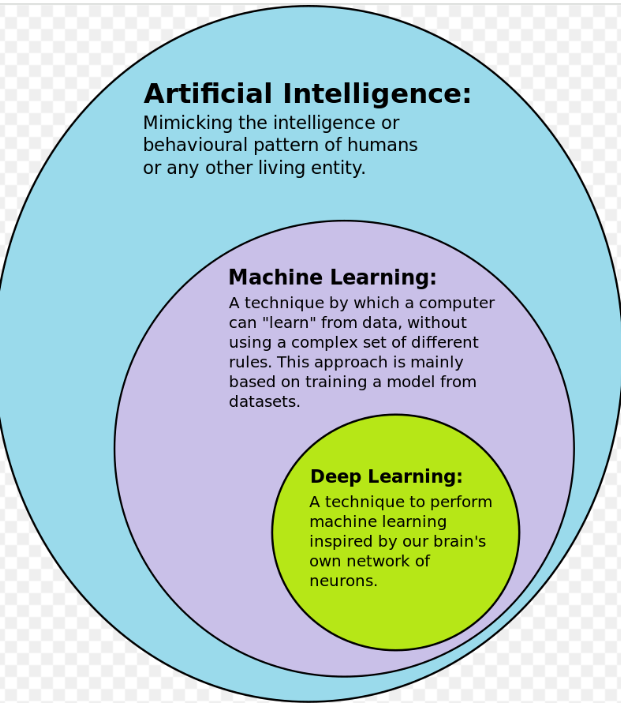

Avimanyu786SVG version: Tukijaaliwa, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

"A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain."

https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain,

"A single-layer feedforward neural network was introduced in the late 1950s by Frank Rosenblatt. It was the starting phase of Deep Learning and   Artificial neural networks. During that time for prediction, Statistical machine learning, or Traditional code Programming is used. Perceptron is one of the first and most straightforward models of artificial neural networks.  Despite being a straightforward model, the perceptron has been proven to be successful in solving specific categorization issues."

https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/


Perceptron

Perceptron is a single layer neural network

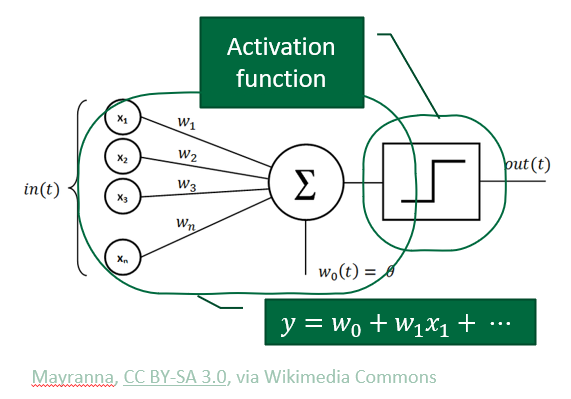                                        

Dhp1080, CC BY-SA 3.0, via Wikimedia Commons                                                 



From Dartmouth Research Computing

"The perceptron consists of a linear regression part and an activation function.
We can think of the regression part as a transformation of the n input features onto a single pseudo-feature.
Depending on the value of that pseudo-feature, the activation function either signals an active or inactive perceptron."

Dartmouth Research Computing, Gentle Introduction to Classification


In [1]:
!pip install numpy
import numpy, random, os
import numpy as np
import pandas as pd
lr = 1 #learning rate
bias = 1 #value of bias
weights = [random.random(),random.random(),random.random()] #weights generated in a list (3 weights in total for 2 neurons and the bias)

In [2]:
def Perceptron(input1, input2, output) :
   outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
   if outputP > 0 : #activation function (here Heaviside)
      outputP = 1
   else :
      outputP = 0
   error = output - outputP
   weights[0] += error * input1 * lr
   weights[1] += error * input2 * lr
   weights[2] += error * bias * lr

The beginning of the program just defines libraries and the values of the parameters, and creates a list which contains the values of the weights that will be modified (those are generated randomly).

Here we create a function which defines the work of the output neuron. It takes 3 parameters (the 2 values of the neurons and the expected output). “outputP” is the variable corresponding to the output given by the Perceptron. Then we calculate the error, used to modify the weights of every connections to the output neuron right after.

create a loop that makes the neural network repeat every situation several times. This part is the learning phase. The number of iteration is chosen according to the precision we want. However, be aware that too much iterations could lead the network to over-fitting, which causes it to focus too much on the treated examples, so it couldn’t get a right output on case it didn’t see during its learning phase.

case here is a bit special, since there are only 4 possibilities, and we give the neural network all of them during its learning phase. A Perceptron is supposed to give a correct output without having ever seen the case it is treating.

In [3]:
for i in range(50) :
   Perceptron(1,1,1) #True or true
   Perceptron(1,0,1) #True or false
   Perceptron(0,1,1) #False or true
   Perceptron(0,0,0) #False or false

In [4]:
x = int(input())
y = int(input())
outputP = x*weights[0] + y*weights[1] + bias*weights[2]
if outputP > 0 : #activation function
   outputP = 1
else :
   outputP = 0
print(x, "or", y, "is : ", outputP)

6
9
6 or 9 is :  1


In [5]:
outputP = 1/(1+numpy.exp(-outputP)) #sigmoid function
outputP

0.7310585786300049

The following is largely taken from the Dartmouth Research Library, Intro to Pytorch

Author: Simon Stone
Edited for DAPL: Sreevalli Sreenivasan

## Pytorch

"PyTorch is a machine learning framework with a major focus on neural networks used for computer vision, audio and natural language processing. The user-facing frontend is written in Python, but the number-crunching is handled by a more optimized C++ backend, including support for outsourcing computations to graphics cards (GPUs) for a substantial increase in speed."



## 1. Structure

The core package of PyTorch is called [`torch`](https://pypi.org/project/torch/). This package contains all the code required to setup and compute general purpose neural networks. It is extended by packages that offer more specialized functions and objects specific to various applications: [`torchvision`](https://pytorch.org/vision/stable/index.html) for Computer Vision (working with images or videos), [`torchaudio`](https://pytorch.org/audio/stable/index.html) for audio processing (e.g. speech recognition or synthesis), and [`torchtext`](https://pytorch.org/text/stable/index.html) for natural language processing. PyTorch is extended by various other packages that comprise the [*PyTorch Ecosystem*](https://pytorch.org/ecosystem/).

## 2. Core components

A plethora of functions and objects can be found within PyTorch. But arguably the most important basic components are:

1. The [`Tensor`](https://pytorch.org/docs/stable/tensors.html#tensor-class-reference) class
2. The differentiation engine [`Autograd`](https://pytorch.org/docs/stable/autograd.html#module-torch.autograd)
3. The neural network building blocks (layers and activation functions) found in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#module-torch.nn)

Before we build our first neural network from scratch, let us walk through these components one at a time:

### The `Tensor` class

<figure style='float:right;max-width:20%;'>
<img src=https://imgs.xkcd.com/comics/machine_learning.png style='padding-right:10px'>
<figcaption>Source: <a href=https://xkcd.com/license.html>XKCD</a> </figcaption>
</figure>

Neural networks are essentially a sequence of linear algebra operations. A [mathematical tensor](https://en.wikipedia.org/wiki/Tensor) is the most general algebraic object, of which simpler algebraic objects can be derived:

- A scalar is a tensor of rank 0:
$$
\left[ 0 \right]
$$
- A vector is a tensor of rank 1 (a.k.a. a collection of rank 0 tensors):
$$
\begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix}
$$
- A matrix is a tensor of rank 2 (a.k.a. a collection of rank 1 tensors):
$$
\begin{bmatrix}
  \begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 3 \right], \left[ 4 \right], \left[ 5 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 6 \right], \left[ 7 \right], \left[ 8 \right] \end{bmatrix}
\end{bmatrix}
$$
- An $n$-dimensional array is a tensor of rank $n$ (a.k.a. a collection of rank $n-1$ tensors):
$$
\begin{bmatrix}
\begin{bmatrix}
  \begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 3 \right], \left[ 4 \right], \left[ 5 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 6 \right], \left[ 7 \right], \left[ 8 \right] \end{bmatrix}
\end{bmatrix},
\begin{bmatrix}
  \begin{bmatrix} \left[ 9 \right], \left[ 10 \right], \left[ 11 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 12 \right], \left[ 13 \right], \left[ 14 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 15 \right], \left[ 16 \right], \left[ 17 \right] \end{bmatrix}
\end{bmatrix},
\ldots
\end{bmatrix}
$$

**Note:** Describing a mathematical tensor as a generalized matrix is not [the whole story](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c). For the purposes of this introduction, this simplified definition shall, however, suffice.

In PyTorch, everything runs on tensors: Your data is encoded in a tensor, the neural networks are expressed as tensors, sending the data through the network is a series of transformations on a tensor. All of these tensors are represented by a class named [`Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor) found in the core `torch` module.

In [6]:
import torch

torch.Tensor([[0, 1, 2], [3, 4, 5]])

tensor([[0., 1., 2.],
        [3., 4., 5.]])

### `Autograd` differentiation engine

<div class="alert alert-block alert-info">

This section is in large parts taken from the [`PyTorch` tutorial "The Fundamentals of Autograd"](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html#what-do-we-need-autograd-for)!
</div>


#### Gradients in neural network training
Calculating gradients is *the* most important computation when training neural networks. If you would like a quick reminder why, read on. Otherwise, you can skip ahead to the [TL;DR](https://en.wikipedia.org/wiki/TL;DR) at the end of this section, or even straight to next section.

A machine learning model is a function, with inputs and outputs. For this discussion, we’ll treat the inputs as an i-dimensional vector $\vec{x}$, with elements $x_{i}$. We can then express the model, $M$, as a vector-valued function of the input:
$$
\vec{y} = \vec{M}\left(\vec{x}\right)
$$
(We treat the value of $M$’s output as a vector because in general, a model may have any number of outputs.)

Since we’ll mostly be discussing autograd in the context of training, our output of interest will be the model’s loss. The loss function
$$
L\left(\vec{y}\right) = L\left(\vec{M}\right)
$$

is a single-valued scalar function of the model’s output. This function expresses how far off our model’s prediction was from a particular input’s ideal output. *Note:* After this point, we will often omit the vector sign where it should be contextually clear - e.g., $y$ instead of $\vec{y}$.

In training a model, we want to minimize the loss. In the idealized case of a perfect model, that means adjusting its learning weights - that is, the adjustable parameters of the function - such that loss is zero for all inputs. In the real world, it means an iterative process of nudging the learning weights until we see that we get a tolerable loss for a wide variety of inputs.

How do we decide how far and in which direction to nudge the weights? We want to minimize the loss, which means making its first derivative with respect to the input equal to 0:

$$
\frac{\partial L}{\partial x} = 0
$$

Recall, though, that the loss is not directly derived from the input, but a function of the model’s output (which is a function of the input directly):

$$
\frac{\partial L}{\partial x}  = \frac{\partial {L({\vec y})}}{\partial x}
$$

By the chain rule of differential calculus, we have

$$
\frac{\partial {L({\vec y})}}{\partial x} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial x}  = \frac{\partial L}{\partial y}\frac{\partial M(x)}{\partial x}.$$

$\frac{\partial M(x)}{\partial x}$ is where things get complex. The partial derivatives of the model’s outputs with respect to its inputs, if we were to expand the expression using the chain rule again, would involve many local partial derivatives over every multiplied learning weight, every activation function, and every other mathematical transformation in the model. The full expression for each such partial derivative is the sum of the products of the local gradient of every possible path through the computation graph that ends with the variable whose gradient we are trying to measure.

In particular, the gradients over the learning weights are of interest to us - they tell us what direction to change each weight to get the loss function closer to zero.

Since the number of such local derivatives (each corresponding to a separate path through the model’s computation graph) will tend to go up exponentially with the depth of a neural network, so does the complexity in computing them.

<div class="alert alert-block alert-info">

**TL;DR:**
Training a neural network means adjusting its parameters so that its output is "as correct as possible". The gradient of the error tells us how a change of the parameters affects the correctness of the output and is therefore *the* essential driver of the training process. Calculating gradients with respect to every single parameter, however, is complex and resource-intensive.
</div>

#### `Autograd` to the rescue

This is where `Autograd` comes in: It tracks the history of every computation performed on a tensor. Every computed tensor in your `PyTorch` model carries a history of its input tensors and the function used to create it. Combined with the fact that `PyTorch` functions meant to act on tensors each have a built-in implementation for computing their own derivatives, this greatly speeds up the computation of the local derivatives needed for learning.

Let's look at a simple example: We will create a set of equidistant values between $0$ and $2\pi$ and then apply a few functions to it. Afterwards we will walk *backwards* through the sequence of calculations and differentiate every step long the way.

First up, we create a tensor of 25 linearly spaced values on the interval $[0, 2\pi]$. By default, `Autograd` will not track the gradient of tensors created in this way. We have to set `requires_grad` explicitly to `True`!

In [7]:
import math

a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

We can now do a calculation on it:

In [8]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

Notice that the result tensor `b` has a property called `grad_fn` that tells us that it is the result of a `sin` operation!

Let's do some more computations:

In [9]:
c = 2 * b
print(c)
d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let’s compute a single-element output, as is the case when computing a loss function.

In [10]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

Each `grad_fn` stored with our tensors allows you to walk the computation all the way back to its inputs with its `next_functions` property. We can drill down on this property to show us the gradient functions for all the prior tensors.

In [11]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nd:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

out:
((<AddBackward0 object at 0x7fe4af8d3d30>, 0),)
((<MulBackward0 object at 0x7fe4af8d3d60>, 0), (None, 0))
((<SinBackward0 object at 0x7fe4af8d12a0>, 0), (None, 0))
((<AccumulateGrad object at 0x7fe4af8d3d60>, 0),)
()

d:
((<MulBackward0 object at 0x7fe4af8d0f70>, 0), (None, 0))
((<SinBackward0 object at 0x7fe4af8d10c0>, 0), (None, 0))
((<AccumulateGrad object at 0x7fe4af8d0a30>, 0),)
()

c:

b:

a:
None


Note that `a.grad_fn` is reported as `None`, indicating that this was an input to the function with no history of its own.

With all this machinery in place, how do we get derivatives out? You call the `backward()` method on the output, and check the input’s `grad` property to inspect the gradients:

In [12]:
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


We will visualize this in a second, but let's try to figure out what we *should* see here. Recall that the computations we did were the following:

$$
d = 2 \cdot \sin\left(a\right) + 1
$$

So the derivative with respect to $a$ should be:

$$
\frac{\partial d}{\partial a} = 2\cdot \cos\left(a\right)
$$

Let's check this by visualizing our result:

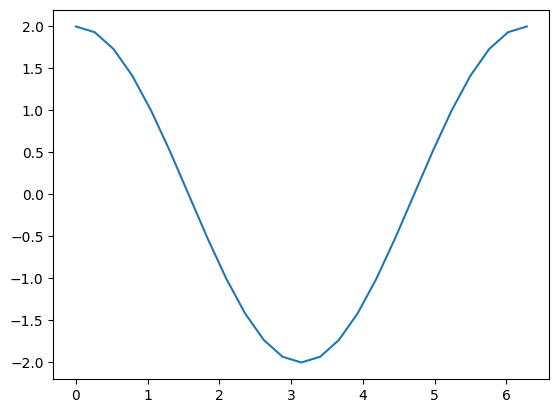

In [13]:
import matplotlib.pyplot as plt

# We need to call the method detach() to signal that the gradients should not be tracked from this point on
plt.plot(a.detach(), a.grad.detach())

🎉 Success! 👏

We will see more of `Autograd` in action later, but first we need to talk about how to build neural networks in `PyTorch`.

### Building blocks for neural networks


<figure style='float:right;width:30%'>

<img src="https://pytorch.org/assets/images/densenet1.png">
<figcaption>

The many layers of [DenseNet](https://pytorch.org/hub/pytorch_vision_densenet/)
</figcaption>
</figure>

Neural networks are made up of a sequence of layers. Unsurprisingly, `PyTorch` offers a great variety of layers as building blocks to string together any desired architecture. They can be found alongside various activation functions in the submodule [`torch.nn`](https://pytorch.org/docs/stable/nn.html).

You can find descriptions of each layer [in the documentation](https://pytorch.org/docs/stable/nn.html#module-torch.nn), but let's quickly mention some of the basic layers together:

- [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): A linear transformation of the incoming data:
  $$ y = xA^\mathrm{T} + b$$
- [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d): A 2D convolution over the incoming data
- [`torch.nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#lstm): Applies a long short-term memory RNN to the input data
- [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout): A dropout layer to randomly zero some of the input values during training

The number of available layer types constantly increases as new architectures are developed in the field. In addition to these, `torch.nn` contains a number of containers to facilitate composing multiple layers into a neural network, which we will do in the next section.

##  An Example: A neural network from scratch

Let's design a neural network to classify flowers from the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)!

We can read the data from the provided CSV file and split it into train and test set using [`pandas`](https://pandas.pydata.org/):

In [17]:
#upload the file from your system
from google.colab import files
uploaded = files.upload()

dataset= pd.read_csv('iris.csv', encoding = 'unicode_escape', engine ='python')

Saving iris.csv to iris (2).csv


In [18]:
# Encode species
class_names = dataset['class'].unique()
dataset['class'] = dataset['class'].map({name: idx for idx, name in enumerate(class_names)})

# Split data randomly into training (90 %) and test (10 %) sets
training_data = dataset.sample(frac=0.9)
test_data = dataset.drop(training_data.index)

Since the native data structure in `PyTorch` is the `Tensor` and its default data types are long integers and single-precision floats, we now convert all objects into `Tensor` of type `torch.long` or `torch.float32`:

In [19]:
# Convert the data into tensors
training_labels = torch.tensor(training_data['class'].values, dtype=torch.long)
training_data = torch.tensor(training_data.drop(columns='class').values, dtype=torch.float32)

test_labels = torch.tensor(test_data['class'].values, dtype=torch.long)
test_data = torch.tensor(test_data.drop(columns='class').values, dtype=torch.float32)

Now that we have some data, we can start designing a neural network for it. Identifying the optimal architecture for this problem is beyond the scope of this notebook. Our focus here is on understanding the building blocks of our neural network and its implementation. We could therefore try something like this:


All neural networks (and, as a matter of fact, also all layers) are derived from the container `Module` found in `torch.nn`. We define the architecture in the subclass' `__init__` method. We also need to implement the `forward` method to define how our network is processing input data:

In [20]:
import torch.nn as nn

class MyNeuralNetwork(nn.Module):
    def __init__(self, input_length, hidden_layer_size, n_classes):
        # Initialize the superclass first
        super(MyNeuralNetwork, self).__init__()

        """ Now we can define the network's structure """
        # The network consists of a single, linear hidden layer...
        self.hidden_layer = nn.Linear(input_length, hidden_layer_size)
        # ...and an output layer
        self.output_layer = nn.Linear(hidden_layer_size, n_classes)

    def forward(self, x):
        """ Here we define the networks behavior as inputs are passed through it """
        # The output of the hidden layer is passed through a tanh activation function
        hidden_layer_activation = torch.tanh(self.hidden_layer(x))
        logits = self.output_layer(hidden_layer_activation)
        return logits

Now that we have defined our network architecture, we can instantiate it by specifying the hidden layer size and the number of output classes:

In [21]:
n_features = training_data.shape[1]
n_species = len(training_labels.unique())
net = MyNeuralNetwork(input_length=n_features, hidden_layer_size=8, n_classes=n_species)

And there it is, our first neural network in PyTorch! 🎉

In [22]:
net

MyNeuralNetwork(
  (hidden_layer): Linear(in_features=4, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

As it stands, the network is not very useful, of course. We need to train it on our dataset so that it can learn patterns in the data. Training a neural network is a high-dimensional optimization problem that seeks to minimize the deviation of the predicted classes from the actual classes. This deviation is expressed by a loss function. Many loss functions have been developed and successfully applied in the field, and PyTorch offers a wide range of loss functions to choose from in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). The choice of the loss function is a design decision that should be carefully weighed. In this example, we will go with the cross entropy loss, which has been shown to work well with multi-class classification problems.

In [23]:
criterion = nn.CrossEntropyLoss()

The other important component in training is the choice of optimizer. The optimizer is essentially a strategy that determines how we update the weights and biases in our network based on a given loss. A number of optimization algorithms are implemented in the module [`torch.optim`](https://pytorch.org/docs/stable/optim.html#algorithms). Here, we will go with the popular stochastic gradient descent (SGD) algorithm.

In [24]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Note that we pass the parameters of our network to the optimizer here as a reference! This is how the network and the optimizer are connected: the optimizer can directly affect the networks parameters.

The training process consists of an outer loop over the epochs (complete passes through the training set) and an inner loop over all observations (or batches of observations) in the training set. Inside the inner loop, we need to do five things:

1. Reset the gradients of all the parameters
2. Let the network genereate outputs
3. Calculate the loss between the outputs and the true labels
4. Compute the gradients of the loss for every parameter
5. Let the optimizer update the parameters

Rinse, repeat, until we have completed all iterations.

Note that before we start training, it is good practice to set the model to "training mode". In our example here, there is no difference between training and evaluation time. But if we had, for example, included a dropout layer, then it is very important to flag the right mode!

In [25]:
import random


net.train()

print('Training', end='')
for epoch in range(100):
    if epoch % 10 == 0:
        print('.', end='')
        paired_data = list(zip(training_data, training_labels))
        random.shuffle(paired_data)
    for inputs, label in paired_data:
        # Reset the optimizer so all gradients are equal to zero
        optimizer.zero_grad()

        # Generate predictions
        outputs = net(inputs)
        # Calculate the loss
        loss = criterion(outputs, label)
        # Computes the gradients
        loss.backward()
        # Optimize weights
        optimizer.step()

print('finished.')

Training..........finished.


In [26]:
net.eval()  # Don't forget to set the model to evaluation mode!
predicted_logits = net.forward(test_data)
predicted_logits

tensor([[ 5.5036, -0.2861, -5.6526],
        [ 5.3654, -0.1760, -5.5849],
        [ 5.6646, -0.4070, -5.7312],
        [ 5.7109, -0.4350, -5.7562],
        [-1.8258,  4.0676, -1.5481],
        [-2.3902,  3.6157, -0.5568],
        [-1.6843,  4.0614, -1.6437],
        [-1.6889,  4.0934, -1.6774],
        [-5.5761,  0.7936,  4.8093],
        [-4.7111,  1.5558,  3.3651],
        [-5.4673,  0.8708,  4.6481],
        [-5.2242,  1.0324,  4.3250],
        [-4.5478,  1.6366,  3.1954],
        [-5.3507,  0.9445,  4.4936],
        [-5.2984,  0.9841,  4.4158]], grad_fn=<AddmmBackward0>)

Our network is trained! Now we can do a forward pass through the network and see what happens!

As you can see, the network does not give us a straight class label prediction. Instead, we get the output that we defined above in the forward method: The log-odds that the observation belongs to each of the three classes.

We can obtain the class label by finding the most likely class, which corresponds to the index of the maximum log-odds:

In [27]:
_, predicted_class = predicted_logits.max(dim=1)
predicted_class

tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

We can now compare these predicted outputs to the actual class labels. Here, we will use some convenient reporting functions from `scikit-learn` (see workshop [*Intro to Machine Learning with scikit-learn*](https://git.dartmouth.edu/lib-digital-strategies/RDS/workshops/machine-learning/intro-to-machine-learning-with-scikit-learn)):

In [28]:
from sklearn.metrics import accuracy_score, classification_report


In [29]:
print(classification_report(test_labels, predicted_class, target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



👏 Nicely done! 💐🎉

"1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)"

https://www.statology.org/sklearn-classification-report/









"Macro averaging is perhaps the most straightforward among the numerous averaging methods. The macro-averaged F1 score (or macro F1 score) is computed by taking the arithmetic mean (aka unweighted mean) of all the per-class F1 scores."

"The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support. Support refers to the number of actual occurrences of the class in the dataset."

https://iamirmasoud.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/


Far from perfect, but definitely a great start! With some additional tuning, we would have a pretty solid, complex classifier from very little data!


## Next steps

- [Official `PyTorch` tutorials](https://pytorch.org/tutorials/index.html)
- The concept of [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
- Batch processing

<table >
<tbody>
  <tr>
    <td style="padding:0px;border-width:0px;vertical-align:center">    
    Created by Simon Stone for Dartmouth College Library under <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons CC BY-NC 4.0 License</a>.<br>For questions, comments, or improvements, email <a href="mailto:researchdatahelp@groups.dartmouth.edu">Research Data Services</a>.
    </td>
    <td style="padding:0 0 0 1em;border-width:0px;vertical-align:center"><img alt="Creative Commons License" src="https://i.creativecommons.org/l/by/4.0/88x31.png"/></td>
  </tr>
</tbody>
</table>